In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [63]:
#database from : https://www.kaggle.com/datasets/laotse/credit-risk-dataset
#import file csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv')

Explorasi Data

In [64]:
#melihat informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [65]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [66]:
#melihat data 5 baris pertama
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [67]:
#melihat data 5 baris terakhir
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [68]:
#melihat isi kolom
df['cb_person_cred_hist_length'].unique()

array([ 3,  2,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 25,
       28, 27, 22, 19, 29, 23, 26, 20, 21, 30, 24, 18])

Melihat missing value

In [69]:
#melihat feature mana saja yang terdapat missing value
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

- Dari hasil diatas ditemukan missing value pada feature "person_emp_length" sebanyak 895 dan "loan_int_rate" sebanyak 3116.
- karena count of missing value ditemukan lumayan banyak jadi langkah yg saya ambil adalah mengisi missing value dengan mean/median.


In [70]:
#melihat isi Feature loan_int_rate
print('isi dari loan_int_rate : ', df['loan_int_rate'].unique())

isi dari loan_int_rate :  [16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74 10.37  8.63
  7.9  18.39 10.65 20.25 18.25 10.99  7.49 16.77 17.58  7.29 14.54 12.68
 17.74  9.32  9.99 12.84 11.12  6.62 14.17 13.85 13.49  7.51 16.89   nan
 17.99 12.69  7.88 19.41 10.38 15.33 16.45 18.62 15.96 11.48  5.99 11.58
 15.7  15.99 14.84 14.42  6.99 13.61  9.91 13.48 12.98 13.57 15.68 13.06
 15.62 11.71  8.88 12.18 13.99  5.42 12.73 11.49 19.91 11.83 14.59  9.64
 16.35 18.67 10.08 10.36 12.23 16.07 14.22 14.79 13.22 11.86 13.43 15.28
 17.93  9.25 10.62 18.43 11.36 15.65 13.04 17.04 14.83 14.65 16.82 10.25
 14.96 11.99  8.49  6.17 16.32 14.35 15.21 14.09 17.49 13.92 16.49  5.79
 13.11  6.54 12.53 15.95 10.74 15.27 14.72 13.35  7.68 14.46 13.47  6.03
 12.92 18.64 16.7  18.3   9.63 14.7  15.37 14.26  8.   11.26 19.04 13.98
 15.58 15.31  9.33 11.91  8.38 10.59 16.   11.54 12.61 17.27 15.05 10.75
  6.39 18.09 19.74  6.91 14.93 17.14 11.03  8.94 11.46  7.66 17.56 10.39
 16.29 17.8  19.69 15.83 

In [71]:
#melihat isi Feature person_emp_length
#print('isi dari person_emp_length : ', df['person_emp_length'].unique())
print('isi dari loan_amnt : ', df['loan_amnt'].unique())

isi dari loan_amnt :  [35000  1000  5500  2500  1600  4500 30000  1750 34800 34000  1500 33950
 33000  4575  1400 32500  4000  2000 32000 31050 24250  7800 20000 10000
 25000 18000 12000 29100 28000  9600  3000  6100  4200  4750  4800  2700
 27600  3250 27500 27050 27000 26000 25600 25475 21600 11900 25300  3650
  6000  2400  3600  7500  4950 21000 16000 22000  7750 24000 15000 15500
  9000 23050  5375  6250  5000  2100 14000  6200  9950  4475  2600  8000
  4600  3500  7200  8800  3175  2800 13000  1800  3300  3200  2275  5600
  3625  4375 24750 24500  3900 13750 15250 24150  2250  4975  4900 23975
 23750 23600 23575  5400  3375 23400 23000  1200 22750 22500 22400 22250
  7400 21700  7000 21500 21450 21250  9250 20900 20500 20400 20375 20050
  6400  5650 16600  7125  3550  1275  3800  1625  8500  7575  5200  4025
  4400  3825  6500  5875  1550  7350  6700  8300 10625 19900 19800   500
   700   750 19000 18950 18800 18750 18725 18550  7100 18500 18400 18250
  1300  5800 18225 18200  137

mengisi dengan mean/median

In [72]:
df_update = df.copy()
df_update['loan_int_rate'] = df_update['loan_int_rate'].fillna(df_update['loan_int_rate'].median())
df_update['person_emp_length'] = df_update['person_emp_length'].fillna(df_update['person_emp_length'].mode()[0])

In [73]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [74]:
df_update.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

check and drop duplicated data

In [75]:
# jumlah data duplicated
df_update.duplicated().sum()

165

In [76]:
# sample dari baris yg terdapat duplicated
df_update[df_update.duplicated(keep=False)].sort_values('person_age').head(6)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16835,21,8088,RENT,0.0,MEDICAL,C,1200,15.23,0,0.15,Y,2
9870,21,65000,MORTGAGE,5.0,DEBTCONSOLIDATION,B,2200,12.42,0,0.03,N,3
16448,21,40000,MORTGAGE,5.0,PERSONAL,A,5000,6.62,0,0.13,N,2
17283,21,21600,OWN,0.0,VENTURE,A,7125,6.99,0,0.33,N,3
16440,21,26000,RENT,5.0,DEBTCONSOLIDATION,A,6000,7.49,0,0.23,N,2
17144,21,28692,MORTGAGE,5.0,EDUCATION,B,3000,10.75,0,0.10,N,2


In [77]:
# drop duplicated rows
df_update = df_update.drop_duplicates()

In [78]:
# sanity check
df_update.duplicated().sum()

0

In [79]:
#melihat dataframe setelah drop duplicated value
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


OUTLIER

In [80]:
#melihat person_age >60 tahun
df_update_temp = df_update[df_update['person_age']>60]
df_update_temp.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3


In [81]:
df_update_temp.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000
mean,71.571429,1.862171e+05,6.228571,12351.071429,11.202714,0.242857,0.18200,23.100000
std,18.970283,7.357179e+05,8.726391,8634.299687,3.137790,0.431906,0.11711,5.848696
min,61.000000,1.063600e+04,0.000000,1000.000000,5.420000,0.000000,0.00000,2.000000
25%,63.000000,4.225000e+04,1.250000,6000.000000,9.112500,0.000000,0.11000,21.000000
50%,65.500000,6.302500e+04,3.000000,10000.000000,10.990000,0.000000,0.16000,24.000000
75%,70.000000,9.435000e+04,7.000000,20000.000000,13.317500,0.000000,0.25000,27.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,18.640000,1.000000,0.52000,30.000000


In [82]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
df_update_temp['person_age_log'] = np.log(df_update_temp['person_age'] + 1)
df_update_temp.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_log
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3,4.976734
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2,4.976734


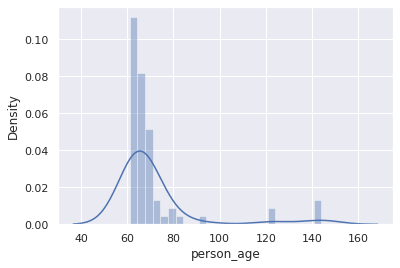

In [84]:
sns.distplot(df_update_temp['person_age'])

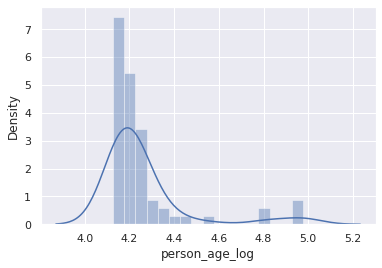

In [85]:
sns.distplot(df_update_temp['person_age_log'])

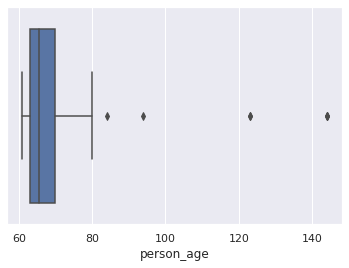

In [86]:
sns.boxplot(df_update_temp['person_age'])

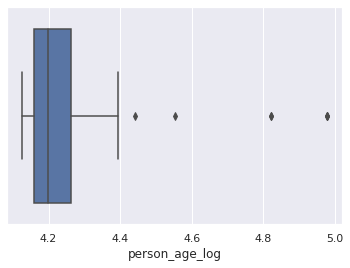

In [87]:
sns.boxplot(df_update_temp['person_age_log'])

Count of Outlier

In [88]:
#mendeteksi outlier menggunakan IQR
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]
    

In [89]:
df_update['outlier_person_age'] = check_outlier(data=df_update, column='person_age')

In [90]:
df_update[df_update['outlier_person_age'] == 'outlier']

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,outlier_person_age
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3,outlier
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2,outlier
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3,outlier
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4,outlier
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,outlier
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,outlier
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,outlier
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,outlier


ditemukan 1491 count of outlier

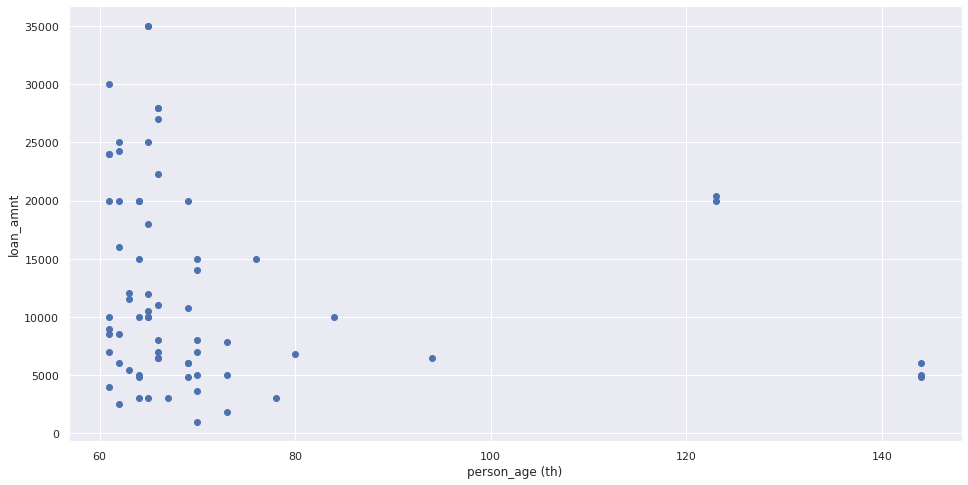

In [51]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_update_temp['person_age'], df_update_temp['loan_amnt'])
ax.set_xlabel('person_age (th)')
ax.set_ylabel('loan_amnt')
plt.show()

dari hasil count of outlier menggunakan scatterplot. seperti tidak begitu kelihatan sampai 1491 total outlier feature "person_age" dengan Age > 60

penanganan terhadap outlier:
- outlier adalah person_age dengan usia lebih dari 60 tahun, sehingga dianggap memiliki credit risk. 2 top range dengan usia 144 tahun ternyata memiliki person_income dengan angka-angka yg besar. 
- outlier tidak dibuang/drop supaya bisa mengetahui person_income yg besar-besar berada pada person_age berapa. walaupun sekarang jarang terlihat seseorang memiliki usia sampe 144 tahun, tetapi hal tersebut terlihat suatu hal yg natural dan masuk akal

Visualisasi Data

Statistical Summary

In [92]:
# mengelompokan data secara numericals dan categoricals
categoricals = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

numericals = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate','loan_status','loan_percent_income', 'cb_person_cred_hist_length']

In [93]:
# menampilkan statistikal sumary numberik
df_update[numericals].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.659427,9593.845632,11.014662,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.162406,6322.730241,3.083050,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [94]:
# menampilkan statistikal sumary kategorikal
df_update[categoricals].describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


In [95]:
# menampilkan precise value counts
# fungsi ini sangat berguna jika kita memiliki banyak data
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df_update[col].value_counts(), '\n')

Value counts of person_home_ownership column
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64 

Value counts of loan_intent column
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64 

Value counts of loan_grade column
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64 

Value counts of cb_person_default_on_file column
N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64 



Univariate Analysis (boxplot untuk variabel numericals)

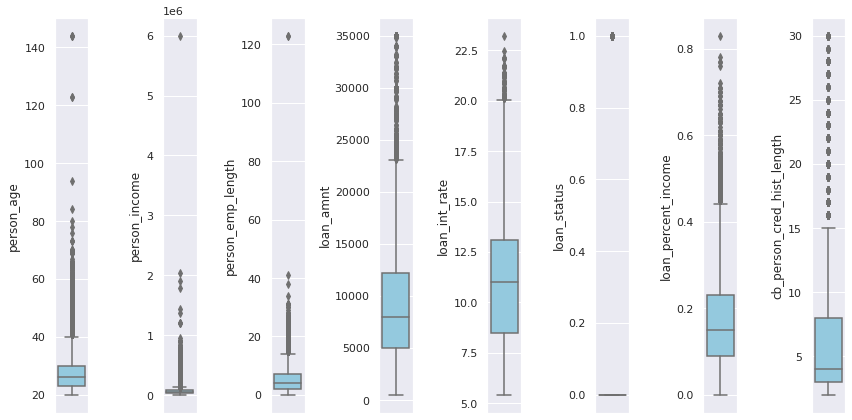

In [96]:
# menyesuaikan ukuran gambar
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_update[features[i]], color='skyblue')
    plt.tight_layout()

dari diagram diatas dapat disimpulkan bahwa semua feature numericals memiliki outlier, kecuali "loan_status" dimana berisi 0 dan 1

Count Plot untuk variabel categoricals

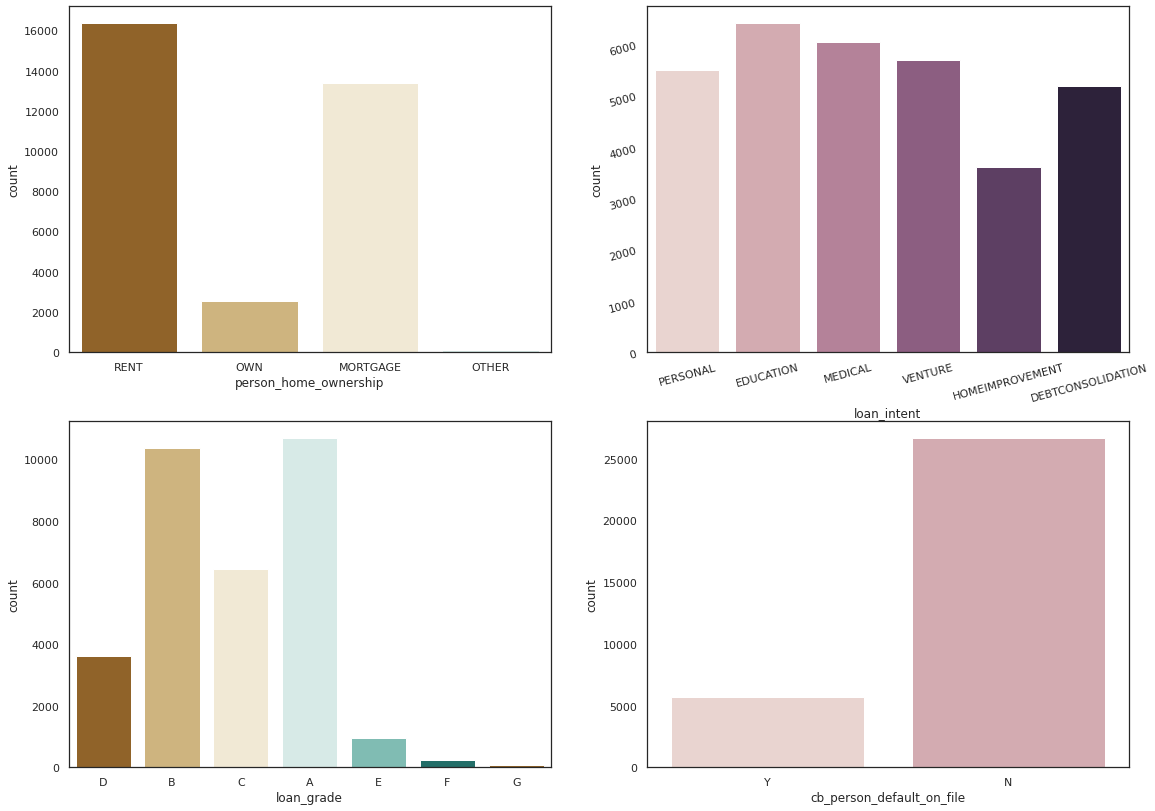

In [205]:
#setting warna background
sns.set_style('white')
# menyesuaikan ukuran gambar
fig, ax = plt.subplots(2,2, figsize=(19,14))

sns.countplot(df_update['person_home_ownership'], ax=ax[0][0], palette=sns.color_palette('BrBG'))
sns.countplot(df_update['loan_intent'], ax=ax[0][1], palette=sns.cubehelix_palette())
sns.countplot(df_update['loan_grade'], ax=ax[1][0], palette=sns.color_palette('BrBG'))
sns.countplot(df_update['cb_person_default_on_file'], ax=ax[1][1], palette=sns.cubehelix_palette())
ax[0][1].tick_params(labelrotation=15)

line plot Bivariate Analisis "person_age, loan_amnt, cb_person_cred_hist_length"

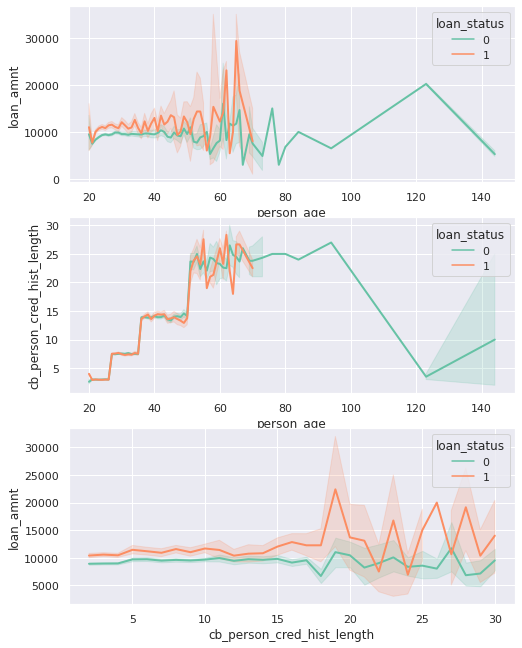

In [97]:
# menyesuaikan ukuran gambar
fig, ax = plt.subplots(3,1, figsize = (8,11))

sns.lineplot(data = df_update, x = 'person_age', y = 'loan_amnt', hue = 'loan_status',  lw = 2, ax = ax[0], palette='Set2')
sns.lineplot(data = df_update, x = 'person_age', y = 'cb_person_cred_hist_length', hue = 'loan_status',  lw = 2, ax = ax[1], palette='Set2')
sns.lineplot(data = df_update, x = 'cb_person_cred_hist_length', y = 'loan_amnt', hue = 'loan_status',  lw = 2, ax = ax[2], palette='Set2')

dari hasil line plot diatas ditemukan:
1. perbedaan "loan_status" yg lumayan tinggi pada "person_age" > 60 tahun
2. perbedaan yg tinggi juga antara "cb_person_cred_hist_length" dan "person_age" dengan value sekitar 50-70
3. mengalami peningkatan value "loan_amnt" pada "cb_person_cred_hist_length" >15

correlation "person_age, loan_amnt, cb_person_cred_hist_length" menggunakan heatmap

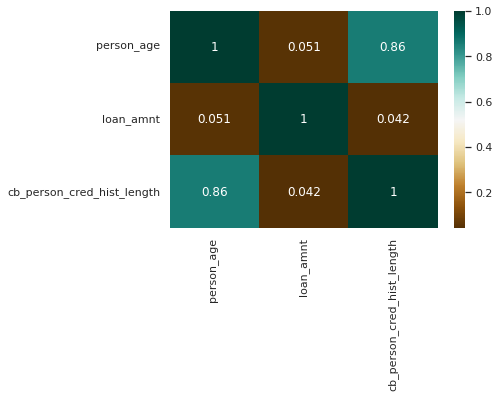

In [99]:
# menyesuaikan ukuran gambar
fig = plt.subplots(figsize=(6,4))

data = df_update[['person_age', 'loan_amnt', 'cb_person_cred_hist_length']]
sns.heatmap(data.corr(), annot = True, cmap='BrBG')

dari hasil korelasi diatas dapat dilihat ada korelasi positif antara feature "person_age" dan "cb_person_cred_hist_lenght"

variabel numerikal "person_age", "loan_amnt", "cb_person_cred_hist_lenght" untuk clustering data

In [102]:
data = df_update[['person_age', 'loan_amnt', 'cb_person_cred_hist_length']]
data.head()

,person_age,loan_amnt,cb_person_cred_hist_length
0,22,35000,3
1,21,1000,2
2,25,5500,3
3,23,35000,2
4,24,35000,4


Distribution dari feature "person_age" , "loan_percent_income", "person_emp_length"

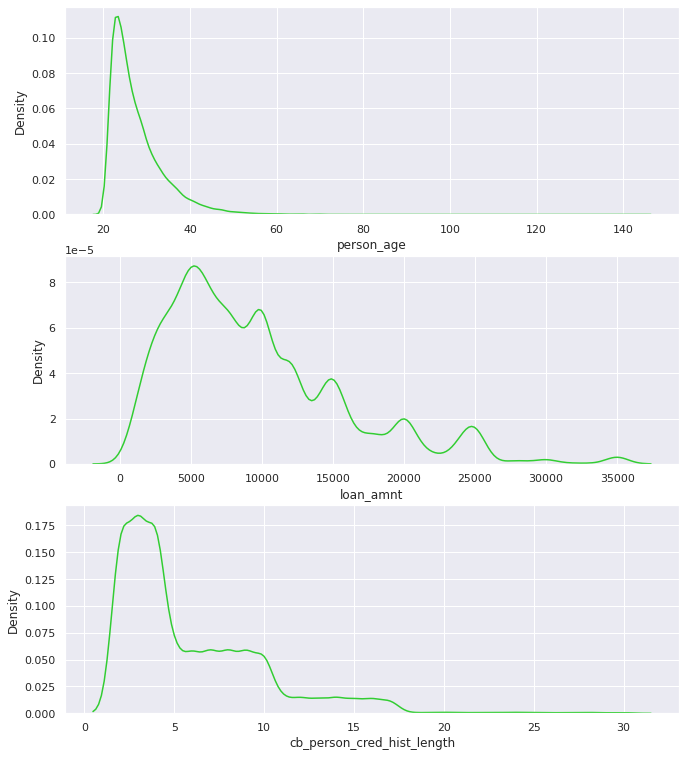

In [103]:
# menyesuaikan ukuran gambar
fig, ax = plt.subplots(3,1, figsize=(11,13))

sns.distplot(data['person_age'], color='limegreen', bins=85, hist=False, ax=ax[0])
sns.distplot(data['loan_amnt'], color='limegreen', bins=85, hist=False, ax=ax[1])
sns.distplot(data['cb_person_cred_hist_length'], color='limegreen', bins=85, hist=False, ax=ax[2])

Log transformation Feature (person_age, loan_percent_income, person_emp_length) untuk menghilangkan skewness

In [104]:
data_log = np.log(data)
data_log.head()

,person_age,loan_amnt,cb_person_cred_hist_length
0,3.091042,10.463103,1.098612
1,3.044522,6.907755,0.693147
2,3.218876,8.612503,1.098612
3,3.135494,10.463103,0.693147
4,3.178054,10.463103,1.386294


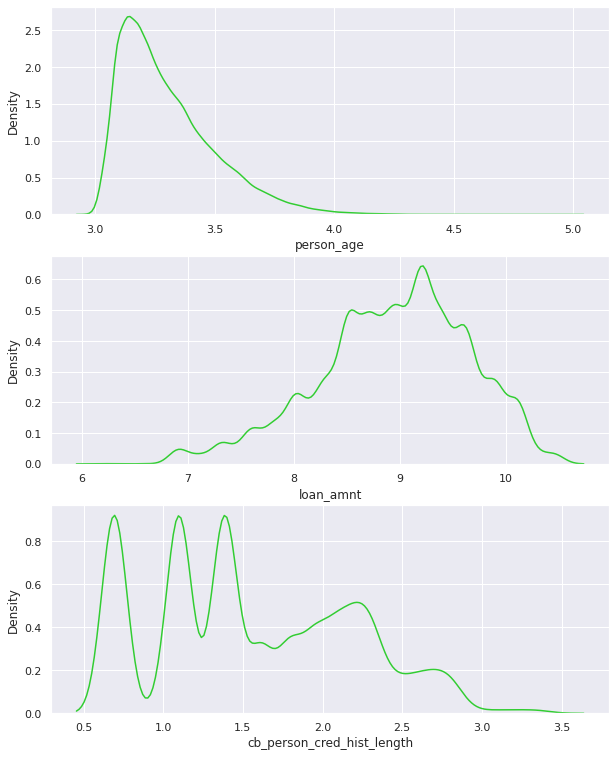

In [105]:
#menyesuaikan ukuran gambar
fig, ax = plt.subplots(3,1, figsize=(10,13))
sns.distplot(data_log['person_age'], color='limegreen', bins=80, hist=False, ax=ax[0])
sns.distplot(data_log['loan_amnt'], color='limegreen', bins=80, hist=False, ax=ax[1])
sns.distplot(data_log['cb_person_cred_hist_length'], color='limegreen', bins=80, hist=False, ax=ax[2])


K-Means Elbow Method Clustering untuk menentukan value K optimal

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_log)

In [109]:
distortions = []
K = range(1,12)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data_scaled)
  distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'K-Means Elbow Method Clustering untuk menentukan value K optimal')

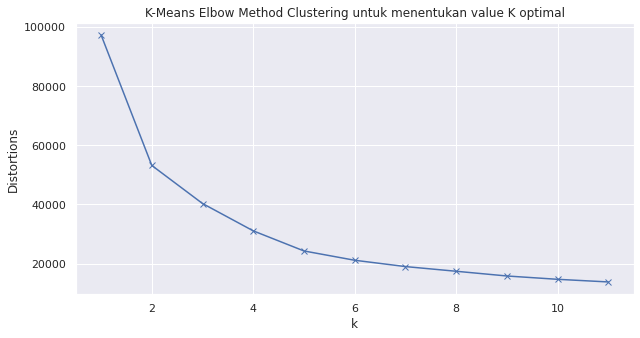

In [112]:
#menyesuaikan ukuran gambar
plt.figure(figsize=(10,5))

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('K-Means Elbow Method Clustering untuk menentukan value K optimal')

saya memilih jumlah cluster 6

In [113]:
# k means algoritma
k = 6
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
df_update['Cluster'] = kmeans.labels_
df_update['Cluster'] = df_update['Cluster'].astype('category')

In [114]:
# 3D scatter plot

fig = px.scatter_3d(df_update, x='person_age', y='loan_amnt', 
                    z='cb_person_cred_hist_length',
                    color='Cluster')
fig.show()

In [115]:
# menentukan nilai percentage setiap cluster
cluster_size = df_update.groupby(['Cluster'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Cluster,size,Percentage
0,0,7409,0.228560
1,1,3088,0.095262
2,2,7485,0.230904
3,3,4703,0.145083
4,4,6837,0.210914
5,5,2894,0.089277


In [117]:
#plot pie chart menampilkan nilai percentage setiap cluster
fig = px.pie(cluster_size, values='Percentage', names='Cluster',
             color_discrete_sequence=px.colors.sequential.RdBu, 
             width=800, height=500, title='Size of Each Cluster (%)')
fig.show()

Dari Pie Chart diatas dapat diketahui bahwa Percentage terbesar berada pada Cluster 2 sebesar 23.1%

Top 10 berdasarkan persone_income dan loan_amnt

In [127]:
# sorting value
top10_prod = (df_update
            .groupby('person_income') 
            .agg(num_trx=('loan_amnt','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_prod

,person_income,num_trx
2283,60000,1040
600,30000,844
1724,50000,772
1169,40000,655
1418,45000,586
2899,75000,577
2511,65000,529
1603,48000,527
2723,70000,525
1273,42000,520


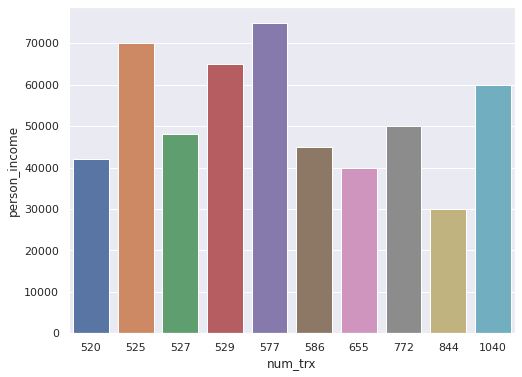

In [128]:
# visualisasi

plt.figure(figsize=(8,6))
sns.barplot(data=top10_prod, y='person_income', x='num_trx')
plt.xticks(rotation=0)
plt.show()

dari hasil Top 10 diatas dapat dilihat bahwa loan_amnt dengan angka person_income sebesar > 70000